## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset

# Merge two dataframes using an inner join
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice.

len(merge_df["Mouse ID"].unique())

249

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# what this does is we are finding within the merge data frame, for duplicate time points within the same mouse ID

duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# after we identify the duplicate time points we create a clean data frame by altering the original merged data frame and altering the Mouse ID column by saying include the ID's that is not in duplicate mice 

clean_df = merge_df[merge_df['Mouse ID'].isin(duplicate_mice)==False]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

sum_stats = pd.DataFrame(clean_df.groupby("Drug Regimen").count())

sum_stats['Mean'] = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
sum_stats['Median'] = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
sum_stats['Variance'] = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
sum_stats['Std Dev'] = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sum_stats['SEM'] = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

sum_stats = sum_stats[['Mouse ID', 'Mean', 'Median', 'Variance', 'Std Dev', 'SEM']]
sum_stats

,Mouse ID,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

single_group_by = clean_df.groupby('Drug Regimen')
sum_stats_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
sum_stats_2

sum_stats_2.rename(columns = {'mean': 'Mean',
                            'median': 'Median',
                            'var': 'Variance',
                            'std': 'Std Dev',
                            'sem': 'SEM'})

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice Per Treatment'}, xlabel='Drug Regimen', ylabel='Number of Mouse'>

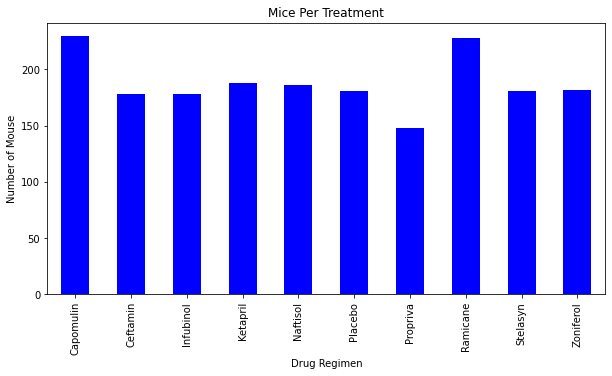

In [60]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_p_treat = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

pandas_plot = mice_p_treat.plot.bar(figsize=(10,5), color='b',fontsize = 10)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse")
plt.title("Mice Per Treatment")

pandas_plot


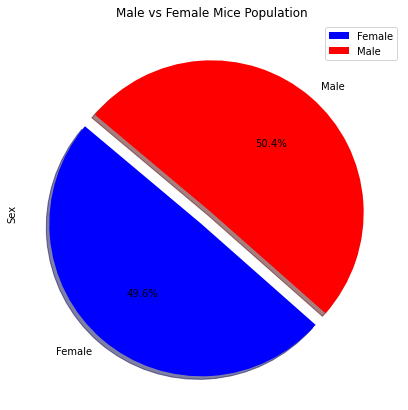

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#  Group by gender 
groupby_gender = clean_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(groupby_gender.size())

# Create data frame with total sex count for mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

plot = mouse_gender.plot.pie(y='Total Count', figsize=(11,7), colors = ['blue', 'red'], startangle=140, explode = (0.1, 0), shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mice Population',fontsize = 12)
plt.ylabel('Sex',fontsize = 10)

plt.show()


## Quartiles, Outliers and Boxplots

In [154]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# So before we do that lets create a dataframe for each drug regimen first 

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]

# Find the last time point for Capomulin mices: we merge it with original dataframe to get the tumour volume at the last time point 

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"))

# Find the last time point for Ramicane mices ... 

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"))

# Find the last time point for Infubinol mices ... 

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"))

# Find the last time point for Ceftamin mices ... 

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"))


In [155]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capmulin

Capomulin_tumor = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Ramicane 

Ramicane_tumor = Ramicane_merge["Tumor Volume (mm3)"]
quartiles =Ramicane_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# infubinol 

Infubinol_tumor = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Ceftamin 
    
Ceftamin_tumor = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = [Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumor]
    

(10.0, 80.0)

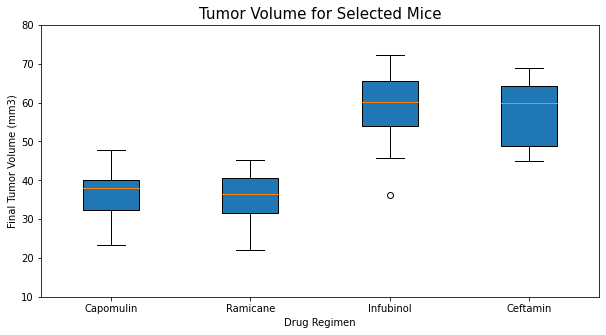

In [159]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_title('Tumor Volume for Selected Mice',fontsize =15)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 10)
ax1.set_xlabel('Drug Regimen',fontsize = 10)
ax1.boxplot(tumor_data, labels=drug_list, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

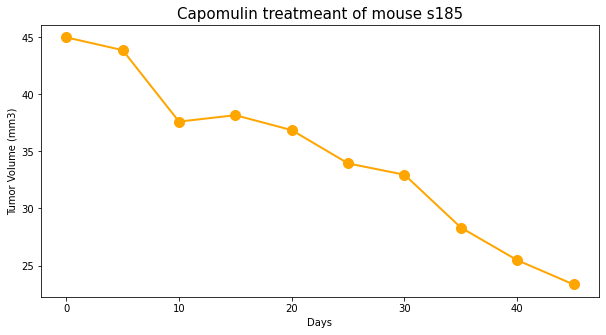

In [116]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_df.head()

# we just want to look at one mouse for this so just pick any mouse ID

s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]

x_axis = s185_df["Timepoint"]
y_axis = s185_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Capomulin treatmeant of mouse s185',fontsize = 15)
plt.plot(x_axis, y_axis,linewidth=2, markersize=10,marker="o",color="orange")
plt.xlabel('Days',fontsize =10)
plt.ylabel('Tumor Volume (mm3)',fontsize = 10)


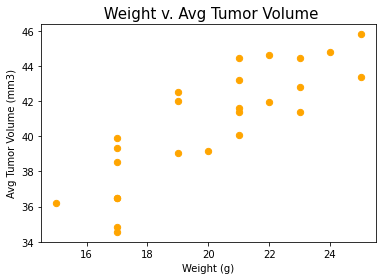

In [132]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
avg_capo =Capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(avg_capo['Weight (g)'],avg_capo['Tumor Volume (mm3)'],s=40, color="orange")
plt.title(' Weight v. Avg Tumor Volume',fontsize =15)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Avg Tumor Volume (mm3)',fontsize =10)

plt.show()

## Correlation and Regression

In [139]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# I'm going to combine finding the correlation coefficient through the linear regresison model since the r-value is the correlation coefficient

x_values = avg_capo['Weight (g)']
y_values = avg_capo['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"Correlation coefficient:{rvalue}")
print(f"stderr:{stderr}")

reg = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(reg)

slope:0.9544396890241045
intercept:21.552160532685015
Correlation coefficient:0.8419363424694718
stderr:0.1275435903320134
y = 0.95x + 21.55
